In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

# Load the CSV file
data_path = '/Users/ilaydadenizikendiz/adult-income.csv'
data = pd.read_csv(data_path)

# Handle missing values (impute with mode for categorical variables)
data = data.replace('?', np.nan)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income'].astype(int)  # Ensure 'income' is categorical

# Normalize the feature data (only features, not target)
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(data.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          3  226802          1                7               4   
1   38          3   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          3  160323         15               10               2   
4   18          3  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
4           9             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

In [34]:
# 2. Model Implementation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Logistic Regression accuracy:", accuracy_log_reg)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg), "\n")


Logistic Regression accuracy: 0.8301371732750973
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11233
           1       0.71      0.46      0.56      3420

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.82     14653

Confusion Matrix:
[[10597   636]
 [ 1853  1567]] 



In [35]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print("Decision Tree accuracy:", accuracy_decision_tree)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree), "\n")

Decision Tree accuracy: 0.8195591346481949
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11233
           1       0.61      0.64      0.62      3420

    accuracy                           0.82     14653
   macro avg       0.75      0.76      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix:
[[9810 1423]
 [1221 2199]] 



In [36]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest accuracy:", accuracy_random_forest)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest), "\n")


Random Forest accuracy: 0.8639868968811847
Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.74      0.64      0.69      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653

Confusion Matrix:
[[10473   760]
 [ 1233  2187]] 



In [37]:
# 3. Model Tuning

from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_
best_log_reg.fit(X_train, y_train)
y_pred_best_log_reg = best_log_reg.predict(X_test)
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)


In [38]:
# Decision Tree Hyperparameter Tuning
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
best_tree.fit(X_train, y_train)
y_pred_best_tree = best_tree.predict(X_test)
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)


In [39]:
# Random Forest Hyperparameter Tuning
param_grid_forest = {'n_estimators': [10, 50, 100], 'max_features': ['sqrt', 'log2']}
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5)
grid_forest.fit(X_train, y_train)
best_forest = grid_forest.best_estimator_
best_forest.fit(X_train, y_train)
y_pred_best_forest = best_forest.predict(X_test)
accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)

In [41]:
# 4. Model Evaluation:

# Logistic Regression Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_best_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log_reg), "\n")

# Decision Tree Evaluation
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_best_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_tree), "\n")

# Random Forest Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_best_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_forest))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11233
           1       0.71      0.46      0.56      3420

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.82     14653

Confusion Matrix:
[[10596   637]
 [ 1852  1568]] 

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11233
           1       0.78      0.57      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.83      0.76      0.79     14653
weighted avg       0.86      0.86      0.86     14653

Confusion Matrix:
[[10676   557]
 [ 1454  1966]] 

Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.74      0.63      0.68      3420

    accu

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.830137  0.557511
1        Decision Tree  0.862758  0.661619
2        Random Forest  0.862417  0.682520 



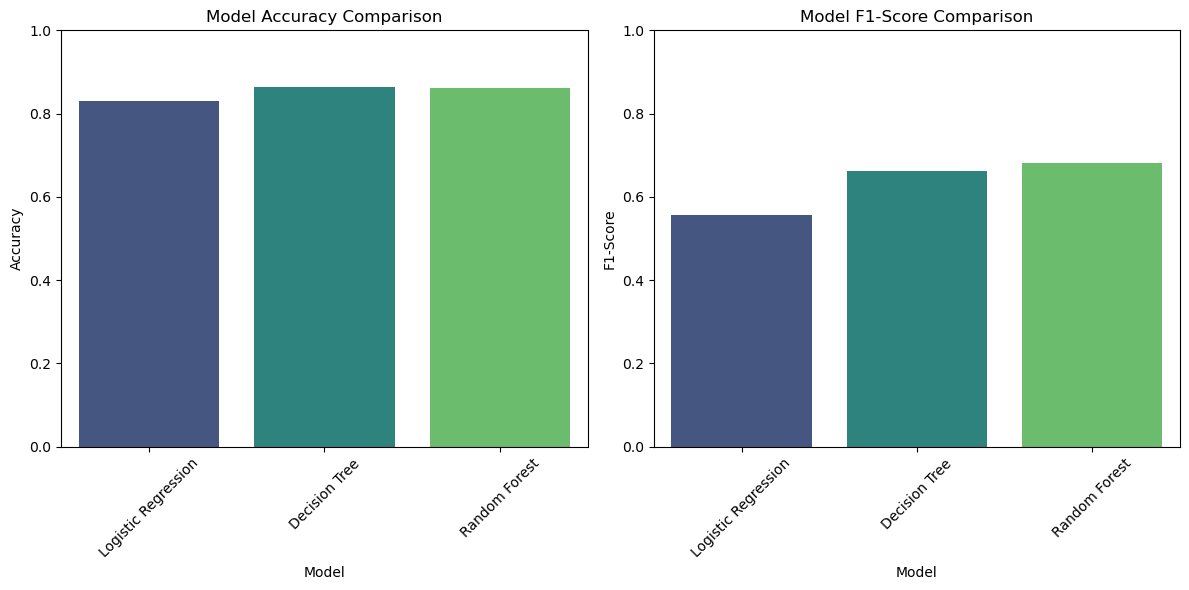

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Calculate F1-scores for each model
f1_best_log_reg = f1_score(y_test, y_pred_best_log_reg)
f1_best_tree = f1_score(y_test, y_pred_best_tree)
f1_best_forest = f1_score(y_test, y_pred_best_forest)

# Create a DataFrame for accuracies and F1-scores
model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_best_log_reg, accuracy_best_tree, accuracy_best_forest],
    'F1-Score': [f1_best_log_reg, f1_best_tree, f1_best_forest]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df, "\n")



# Creating a bar plot for model accuracies and F1-scores
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)

# F1-Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1-Score', data=performance_df, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()
